# Assignment 3

Untuk assignment ini, akan digunakan bank-additional.csv sebagai test data set dan bank-additional-full.csv sebagai training data set.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
test = pd.read_csv('dataset/bank-additional.csv')
train = pd.read_csv('dataset/bank-additional-full.csv')

test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Data Preprocessing

In [63]:
test.isnull().sum().sum()

0

In [64]:
train.isnull().sum().sum()

0

Karena test dan train dataframe tidak memiliki nilai null, tidak ada data yang dihapus.

In [65]:
test.duplicated().sum()

0

In [66]:
train.duplicated().sum()

12

Kejadian adanya data duplikat diberi toleransi karena bisa jadi memang ada 12 orang yang memiliki respon dengan atribut pribadi (umur, pekerjaan, dll) yang sama

## Logistic Regression

Dalam percobaan logistic regression ini, akan dilakukan regresi terkait hubungan subscription (y) dan durasi kontak (duration)

In [19]:
x_train = train["duration"].to_numpy().reshape(-1, 1)
y_train = train["y"]

x_test= test["duration"].to_numpy().reshape(-1, 1)
y_test= test["y"]

### Training

In [15]:
log_reg = LogisticRegression().fit(x_train, y_train)

Berikut ini adalah intercept_ (b0) dan coef_ (b1) yang dapat digunakan untuk menghitung probabilitas.

In [16]:
print(log_reg.intercept_, log_reg.coef_)

[-3.29316999] [[0.00365637]]


Berikut ini adalah skor yang didapatkan apabila model log_reg diminta untuk memprediksi training data set.

In [17]:
log_reg.score(x_train, y_train)

0.893148489851413

### Testing

Berikut ini adalah hasil dari penebakan model log_reg terhadap testing data set.

In [23]:
log_reg.predict(x_test)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

Berikut ini adalah skor yang didapatkan apabila model log_reg diminta untuk memprediksi testing data set.

In [22]:
log_reg.score(x_test, y_test)

0.8980335032774945

## K-Nearest Neighbors

Kita akan melakukan klasifikasi ke beberapa grup pada data yang berkaitan dengan umur (age) dan euribor 3 bulan (euribor3m). Untuk mendapatkan nilai K yang tepat, akan dilakukan pengujian terlebih dahulu menggunakan elbow method. Elbow method menggunakan WCSS, yakni Within-Cluster Sum of Square yang merupakan jumlah kuadrat dari jarak setiap titik ke titik tengah dari grup.

In [97]:
x = test["age"].to_numpy().reshape(-1, 1)
y = test["euribor3m"]

df = test[["age", "euribor3m"]]
df.head()

,age,euribor3m
0,30,1.313
1,39,4.855
2,25,4.962
3,38,4.959
4,47,4.191


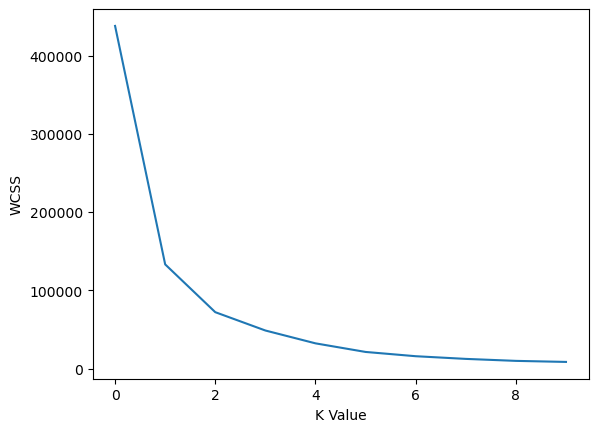

In [96]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x, y) 
    wcss.append(kmeans.inertia_)

plt.plot(wcss)
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

Dari grafik di atas, terlihat bahwa elbow point berada pada K = 2.

In [90]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
kmeans = kmeans.fit_predict(df)

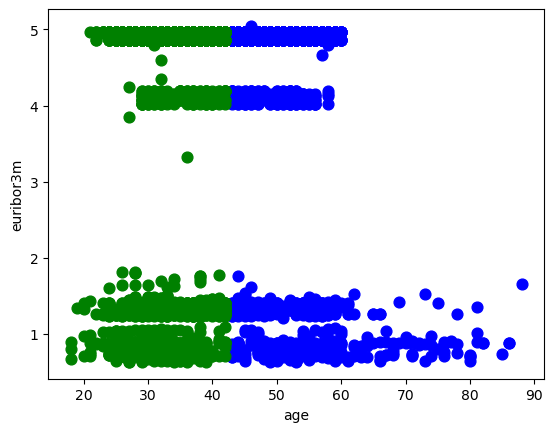

In [91]:
sns.scatterplot(x="age", y="euribor3m", data=df)
plt.scatter( df["age"][kmeans == 1], df["euribor3m"][kmeans == 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( df["age"][kmeans == 0], df["euribor3m"][kmeans == 0], s = 60, c = 'green', label = 'Cluster1')

plt.show()

## Support Vector Machine

Kita akan mencoba melakukan klasifikasi ke beberapa grup pada data yang berkaitan dengan umur (age) dan subscription (y) menggunakan teknik SVM

In [101]:
x_test = test["age"].to_numpy().reshape(-1, 1)
y_test = test["y"]

x_train = train["age"].to_numpy().reshape(-1, 1)
y_train = train["y"]

In [103]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

Model SVM akan dihitung tingkat akurasinya.

In [104]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.890507404709881


Terlihat bahwa akurasi dari model SVM yang dibuat adalah 89%

## Decision Tree

Akan dibuat decision tree yang dapat memberikan prediksi yes atau no untuk subsciprion berdasarkan atribut-atribut yang ada pada tabel.

In [36]:
x_train = train.loc[:, train.columns != "y"]
y_train = train["y"].loc[:]

x_test = test.loc[:, train.columns != "y"]
y_test = test["y"].loc[:]

x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [38]:
x_train = MultiColumnLabelEncoder().fit_transform(x_train)
y_train = LabelEncoder().fit_transform(y_train)

x_test = MultiColumnLabelEncoder().fit_transform(x_test)
y_test = LabelEncoder().fit_transform(y_test)

In [39]:
decision_t = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.8907501820830298

Terlihat dari hasil score di atas bahwa decision tree dapat menebak benar 89.07% subscription yang ada pada test data

## Random Forest

Akan dibuat random forest yang dapat memberikan prediksi yes atau no untuk subsciprion berdasarkan atribut-atribut yang ada pada tabel.

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9487739742655984

Random forest yang dibuat dapat menebak benar sebanyak 94.87% dari subscription yang ada pada test data. Ini melebihi akurasi dari decision tree.

## Native Bayes

Akan dibuat model Naive Bayes yang memprediksi subscription berdasarkan probabilitas dari seluruh atribut/kolom yanga da pada tabel

In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.7540665210002427

Terlihat dari hasil score di atas bahwa naive bayes dapat menebak benar 75.4% subscription yang ada pada test data

## Confusion Matrix

Karena model dengan naive bayes adalah model yang memiliki skor paling kecil dibandingkan model-model lainnya, akan dibuat confusion matrix dari model naive bayes yang sebelumnya telah dibuat.

In [53]:
from sklearn import metrics 

actual = y_test
predicted = nb.predict(x_test)

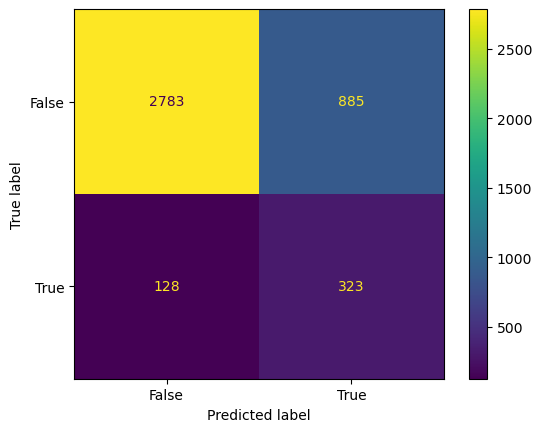

In [54]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

## Visualization

Akan dibuat dua grafik untuk visualisasi data set. Grafik pertama akan menunjukkan box plot dari kolom "y" dan grafik kedua akan menunjukkan histogram dari "age". Untuk kedua grafik, data diambil dari data training.

Text(0, 0.5, 'Subscription')

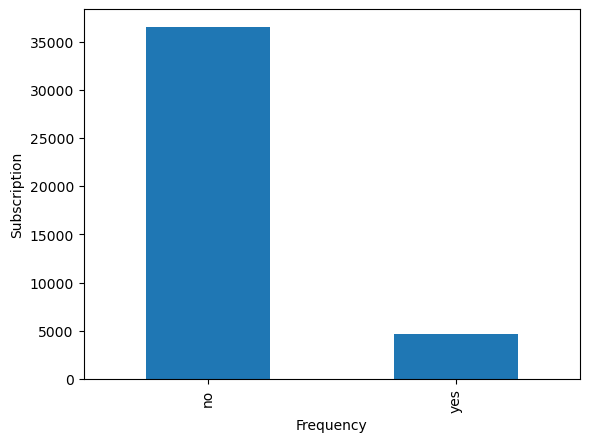

In [60]:
train['y'].value_counts(sort=False).plot.bar()
plt.xlabel('Frequency')
plt.ylabel('Subscription')

Berdasarkan grafik di atas, terlihat bahwa proporsi antara "yes" dan "no" sangatlah jauh. Data didominasi oleh kejadian di mana "y" adalah no.

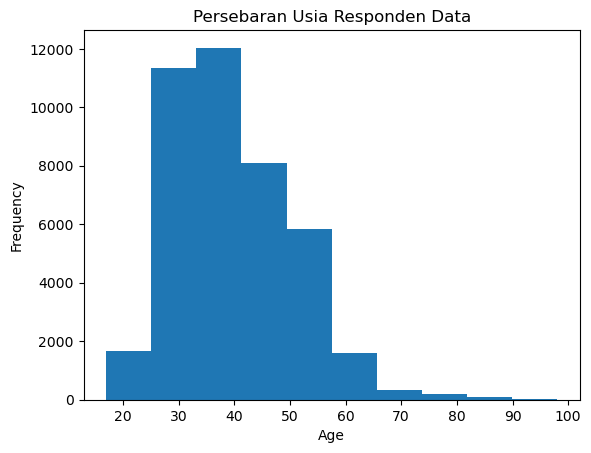

In [61]:
plt.hist(train['age'])
plt.title('Persebaran Usia Responden Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa proporsi data diisi oleh responden yang berada pada usia di sekitar 30-40 tahun.